In [127]:
library(xlsx)
library(plyr)
library(lattice)
library(ggplot2)

<html><b>PART A</b></html>

<html><b>Reading NHL data</b></html>

In [128]:
data <- read.xlsx("NHLTop100.xlsx",sheetName="Top 100",header=T)
data <- data[,c("Player","G","A")]
data

Player,G,A
Wayne Gretzky,894,1963
Mark Messier,694,1193
Gordie Howe,801,1049
Ron Francis,549,1249
Marcel Dionne,731,1040
Steve Yzerman,692,1063
Mario Lemieux,690,1033
Jaromir Jagr,681,1007
Joe Sakic,625,1016
Phil Esposito,717,873


In [129]:
top10 <- data.frame("G"=data$G,"A"=data$A)
#top10

<html><b>creating a LM model</b></html>

In [130]:
summary(top10)
model <- lm(top10)

       G               A         
 Min.   :185.0   Min.   : 421.0  
 1st Qu.:391.0   1st Qu.: 585.0  
 Median :470.5   Median : 700.5  
 Mean   :475.4   Mean   : 741.8  
 3rd Qu.:550.8   3rd Qu.: 816.8  
 Max.   :894.0   Max.   :1963.0  

<html><b>Noting Rsquared and p value</b></html>

In [131]:
summary(model)$r.squared    #r squared
summary(model)$coefficients[2,4]   #p-value

[1] 0.1082305

[1] 0.0008317169

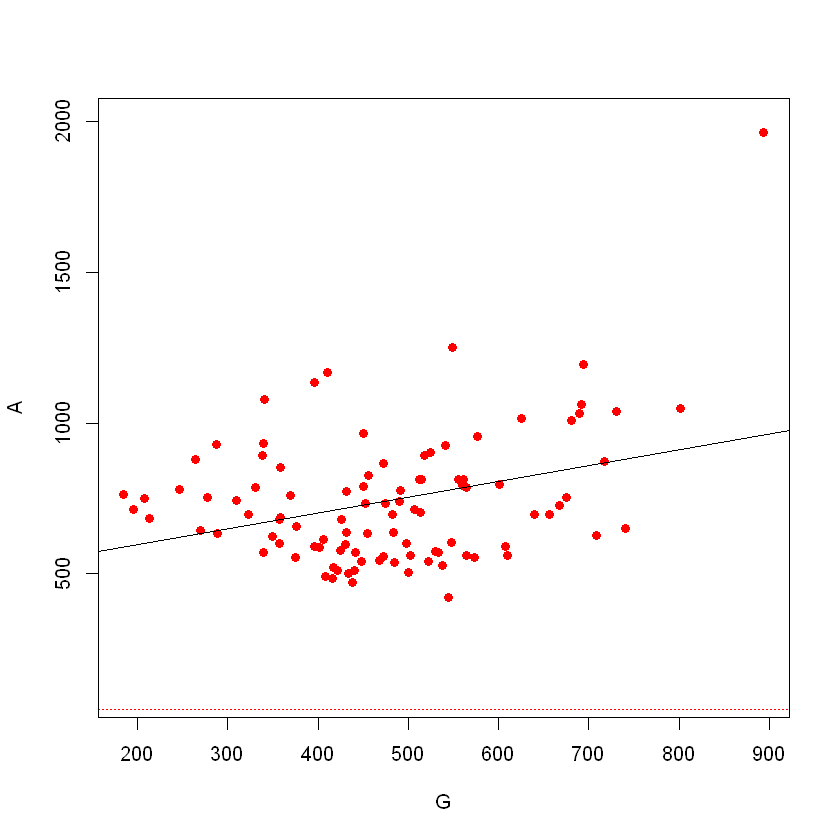

In [132]:
plot(top10,pch=19,ylim=c(100,2000),panel.first=abline(h=c(0,50),v=c(0,10),lty=3,col="red"),col="red")  #dont use this.
abline(lm(A~G, data=top10))

<html><b>PART B</b></html>

<html><b>Passing the line through Wayne Gretzky</b></html>

In [133]:
model_1 <- lm(I(data$A-1963) ~ I(data$G-894))
model_1


Call:
lm(formula = I(data$A - 1963) ~ I(data$G - 894))

Coefficients:
    (Intercept)  I(data$G - 894)  
     -1003.4220           0.5202  


In [134]:
model_wayne <- lm(I(data$A+1003.4220) ~ I(data$G), data = top10)
summary(model_wayne)


Call:
lm(formula = I(data$A + 1003.422) ~ I(data$G), data = top10)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1497.9355    74.6410  20.069  < 2e-16 ***
I(data$G)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [135]:
intercept_wayne <- summary(model_wayne)$coefficients[1,1]
slope_wayne <- summary(model_wayne)$coefficients[2,1]
intercept_wayne
slope_wayne

[1] 1497.936

[1] 0.5202063

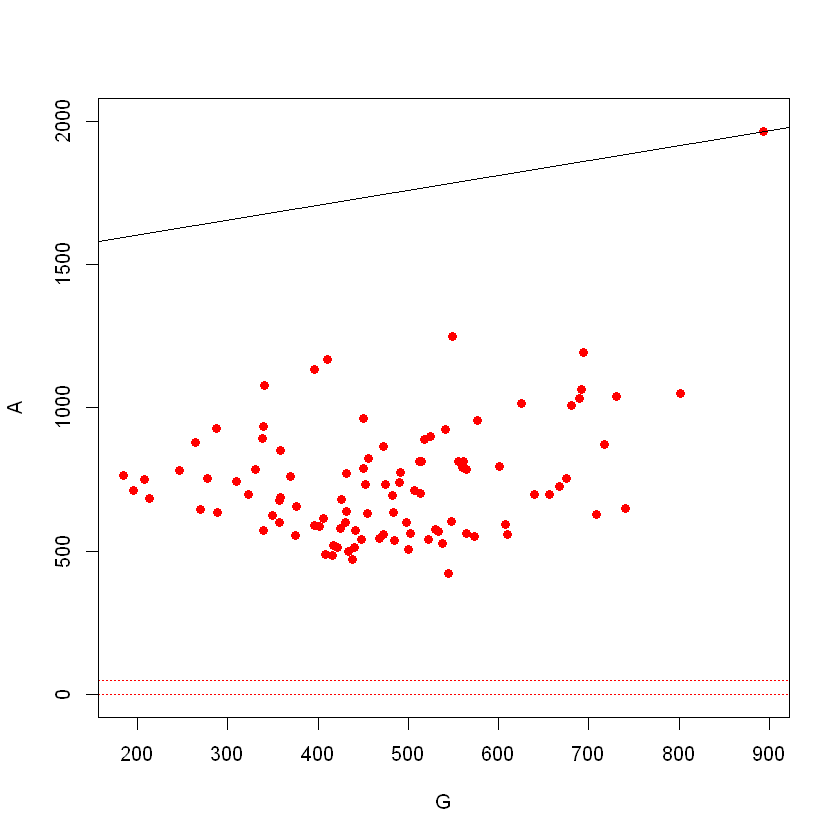

In [136]:
plot(top10,pch=19,ylim=c(0,2000),panel.first=abline(h=c(0,50),v=c(0,10),lty=3,col="red"),col="red")  #dont use this.
abline(intercept_wayne,slope_wayne)
#abline(lm(I(A-1963)~I(G-894)+0, data=top10))

<html><b>Noting R squared and p values</b></html>

In [137]:
summary(model_wayne)$r.squared    #r squared
summary(model_wayne)$coefficients[2,4]   #p-value

[1] 0.1082305

[1] 0.0008317169

<html><b>PART C</b><html>

<html><b>Adding the Goals and assists values for Patrick Kane</b></html>

In [138]:
patrick_kane <- data.frame(Player = "Patrick Kane", G =285, A=465)
patrick_kane

Player,G,A
Patrick Kane,285,465


In [139]:
data_patrick <- rbind(data,patrick_kane)
data_patrick

Player,G,A
Wayne Gretzky,894,1963
Mark Messier,694,1193
Gordie Howe,801,1049
Ron Francis,549,1249
Marcel Dionne,731,1040
Steve Yzerman,692,1063
Mario Lemieux,690,1033
Jaromir Jagr,681,1007
Joe Sakic,625,1016
Phil Esposito,717,873


<html><b>Passing the line through Patrick Kane</b></html>

In [140]:
model_2 <- lm(I(data_patrick$A-465) ~ I(data_patrick$G-285))
model_2


Call:
lm(formula = I(data_patrick$A - 465) ~ I(data_patrick$G - 285))

Coefficients:
            (Intercept)  I(data_patrick$G - 285)  
               172.7210                   0.5377  


In [141]:
model_patrick <- lm(I(data_patrick$A-172.7210) ~ I(data_patrick$G), data = top10)
summary(model_patrick)


Call:
lm(formula = I(data_patrick$A - 172.721) ~ I(data_patrick$G), 
    data = top10)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.98 -172.72   -8.94  126.20  997.84 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       311.7661    73.5891   4.237 5.09e-05 ***
I(data_patrick$G)   0.5377     0.1492   3.603 0.000493 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.7 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.107 
F-statistic: 12.98 on 1 and 99 DF,  p-value: 0.0004934


In [151]:
intercept_patrick <- summary(model_patrick)$coefficients[1,1]
slope_patrick <- summary(model_patrick)$coefficients[2,1]
intercept_patrick
slope1 <- 1963/894
slope2 <- 465/285
intercept1 <- 0
slope_patrick

[1] 311.7661

[1] 0.537663

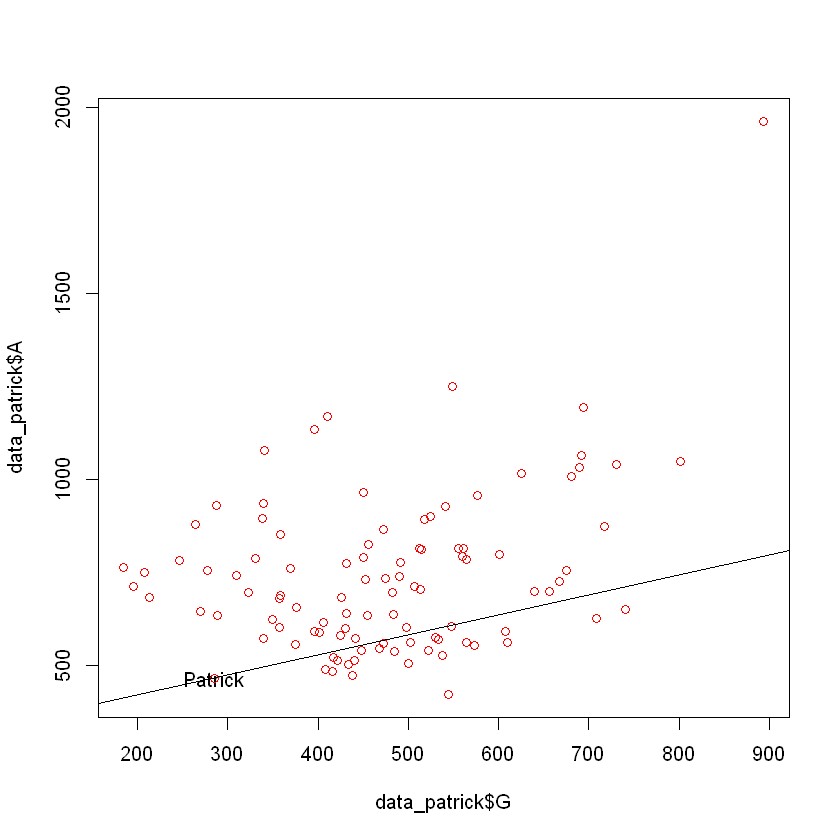

In [145]:
plot(data_patrick$G,data_patrick$A,col="red",text(285,465,labels="Patrick"))  #dont use this.
abline(intercept_patrick,slope_patrick)

<html><b>R squared and p values</b></html>

In [146]:
summary(model_patrick)$r.squared    #r squared
summary(model_patrick)$coefficients[2,4]   #p-value

[1] 0.1159517

[1] 0.0004934439

<html><b>PART D.</b></html>

In [161]:
model_3 <- lm(I(data$A-1963) ~ I(data$G-894)+0)
model_3


Call:
lm(formula = I(data$A - 1963) ~ I(data$G - 894) + 0)

Coefficients:
I(data$G - 894)  
          2.685  


In [163]:
summary(model_3)
summary(model_3)$r.squared    #r squared
#summary(model_3)$coefficients[2,4]   #p-value


Call:
lm(formula = I(data$A - 1963) ~ I(data$G - 894) + 0)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
I(data$G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


[1] 0.9091456

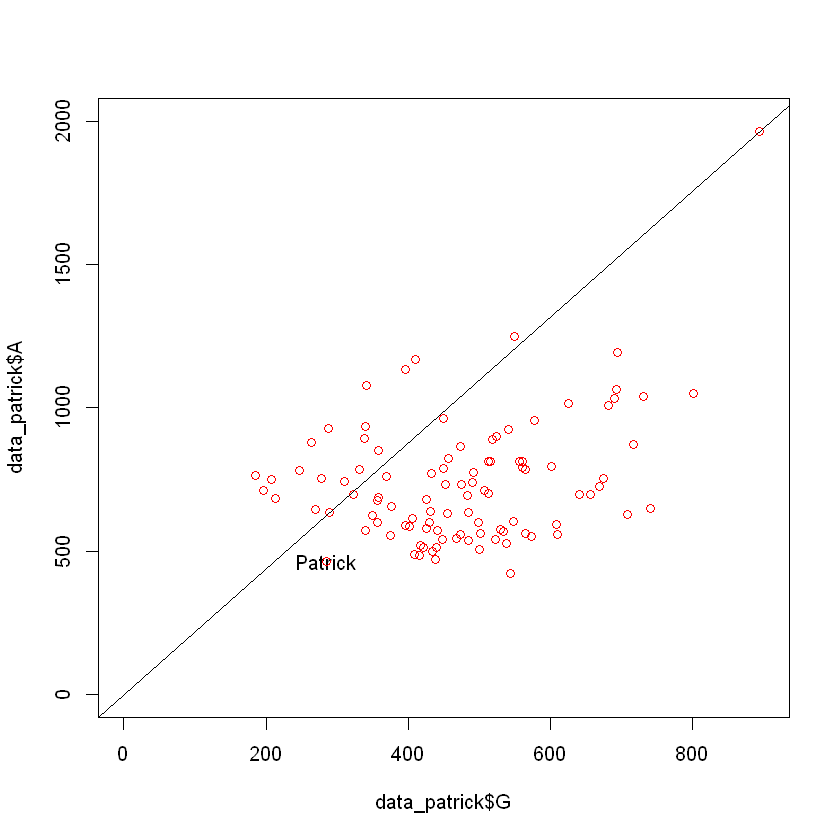

In [156]:
plot(data_patrick$G,data_patrick$A,ylim=c(0,2000),xlim=c(0,900),col="red",text(285,465,labels="Patrick")) 
abline(intercept1,slope1)

In [159]:
model_4 <- lm(I(data_patrick$A-465) ~ I(data_patrick$G-285)+0)

In [164]:
summary(model_4)
summary(model_4)$r.squared    #r squared



Call:
lm(formula = I(data_patrick$A - 465) ~ I(data_patrick$G - 285) + 
    0)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -114.55   40.53  165.99  807.05 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
I(data_patrick$G - 285)   1.1346     0.0979   11.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 229.8 on 100 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 134.3 on 1 and 100 DF,  p-value: < 2.2e-16


[1] 0.5731817

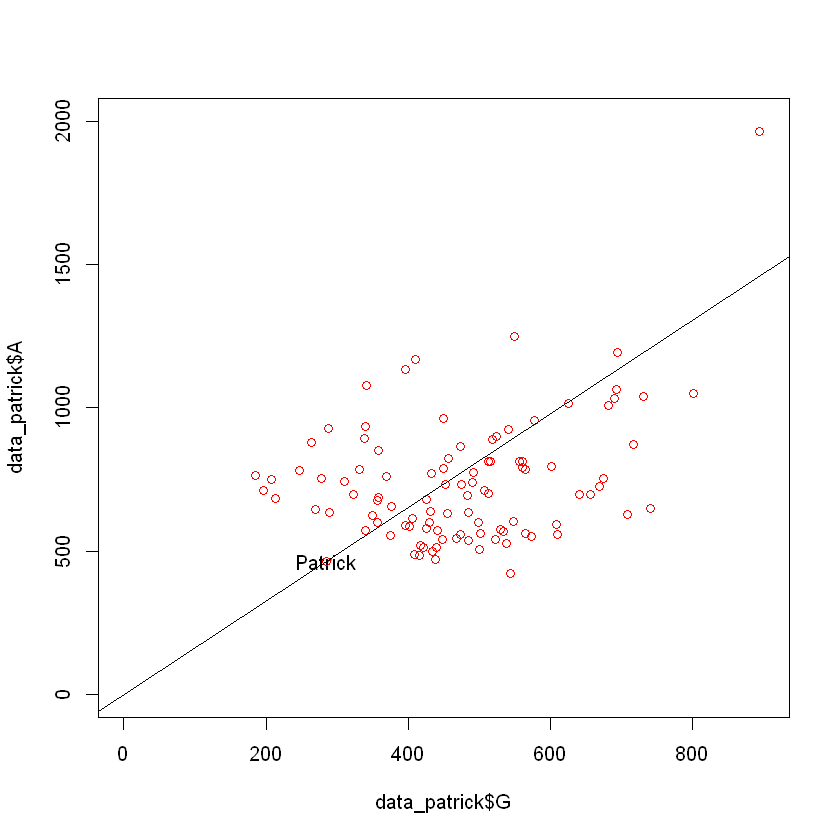

In [157]:
plot(data_patrick$G,data_patrick$A,ylim=c(0,2000),xlim=c(0,900),col="red",text(285,465,labels="Patrick"))  
abline(intercept1,slope2)

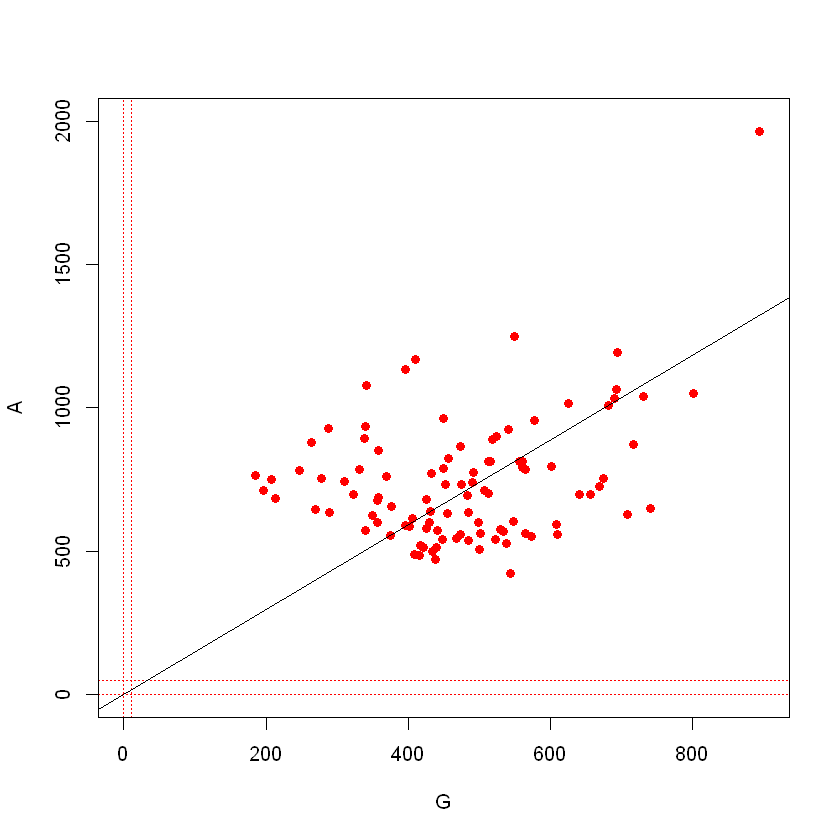

In [167]:
plot(top10,pch=19,ylim=c(0,2000),xlim=c(0,900),panel.first=abline(h=c(0,50),v=c(0,10),lty=3,col="red"),col="red")  #dont use this.
abline(lm(A~G+0, data=top10))

In [168]:
Rsquare_Pvalue <- data.frame(Model=c("Default Model","Passing through Gretzky","Passing through Patrick","Passing through Gretzky and Origin","Passing through Patrick and Origin"),R=c(0.1082,0.1082,0.1159,0.9091,0.5731), P=c(0.00083,0.00083,0.00049,2.2e-16,2.2e-16))

In [169]:
Rsquare_Pvalue

Model,R,P
Default Model,0.1082,8.3e-04
Passing through Gretzky,0.1082,8.3e-04
Passing through Patrick,0.1159,4.9e-04
Passing through Gretzky and Origin,0.9091,2.2e-16
Passing through Patrick and Origin,0.5731,2.2e-16


<html><b>
<p>R-squared is a statistical measure of how close the data are to the fitted regression line. In general, the higher the R-squared, the better the model fits the data. Therefore, since the model passing through Gretzky and Origin has the highest R squared value, this means this model fits the the best.</p>

<p>
P values evaluate how well the sample data support that the null hypothesis is true. It measures how compatible the data is with the null hypothesis. a P value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis. High P values: your data are likely with a true null.
Low P values: the data is unlikely with a true null.
A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population. <br> Therefore since the model passing through Gretzky and Origin, and the model passing through Patrick and origin have the lowest p-values, this suggests that it is higly unlikely with a true null hypothesis.</p> 
</b></html>